# 1. **Business Understanding**

Before diving into the data, it's important to define the business problem and objectives. For the sake of this demonstration, let's assume the business problem is to predict the price of used cars based on their features, and our objective is to build a predictive model with high accuracy.

Please find the attached dataset of Used Cars Dataset: https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset





In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.7 MB/s eta 0

# 2. **Data Understanding:**

Let's start by loading and exploring the used_cars.csv dataset to get an understanding of the data we're working with.

First, we'll load the dataset and take a look at the first few rows:


In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving used_cars.csv to used_cars.csv


In [ ]:
used_cars = pd.read_csv('used_cars.csv')

In [ ]:
used_cars.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


The dataset provides details about used cars, including their **brand**, **model**, **model year**, **mileage**, **fuel type**, **engine specifications**, **transmission type**, **exterior** and **interior color**, **accident history**, **clean title status**, and **price**.


***Some initial observations:***

Some columns, like **milage** and **price**, have non-numeric values (such as "mi." and "$"). These will need to be cleaned.

The **accident** column indicates whether the car has had any accidents or damage reported.

The **clean_title** column has some missing values.

# 3. **Data Preparation:**

In this step, we'll clean and preprocess the data to get it ready for modeling. This may involve:

Removing or imputing missing values
Converting non-numeric columns to numeric format
Encoding categorical variables
Let's start by cleaning the **milage** and **price** columns and handling missing values:

In [ ]:
# Remove non-numeric characters from 'milage' and 'price' columns and convert them to numeric
used_cars['milage'] = used_cars['milage'].str.replace(',', '').str.extract('(\d+)').astype(float)
used_cars['price'] = used_cars['price'].str.replace(',', '').str.extract('(\d+)').astype(float)

# Fill missing values in 'clean_title' column with a placeholder 'Unknown'
used_cars['clean_title'].fillna('Unknown', inplace=True)

# Check for any remaining missing values in the dataset
missing_values = used_cars.isnull().sum()

missing_values


brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title       0
price             0
dtype: int64

We can see that there are missing values in the **"fuel_type"** and **"accident"** columns. For simplicity, we can fill these missing values with a placeholder, such as "Unknown".

Let's handle these missing values and then move on to encoding the categorical variables:

In [ ]:
# Fill missing values in 'fuel_type' and 'accident' columns with 'Unknown'
used_cars['fuel_type'].fillna('Unknown', inplace=True)
used_cars['accident'].fillna('Unknown', inplace=True)

# Confirm that there are no more missing values
missing_after_imputation = used_cars.isnull().sum()

missing_after_imputation


brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

All missing values have been addressed.

Next, we'll use **"scikit-learn"** to further preprocess the data, including encoding categorical variables, splitting the data into training and testing sets, and scaling features where necessary.

# 4. **Modeling with scikit-learn:**

Given the size and complexity of the dataset, a good starting point could be a Random Forest regressor. It can handle non-linearities in the data and is less prone to overfitting.

Steps:

1. Encoding the categorical variables.
2. Splitting the dataset into training and testing sets.
3. Building and training a Random Forest model.
4. Evaluating the model.

Let's start with encoding the categorical variables using one-hot encoding.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# One-hot encode the categorical variables
used_cars_encoded = pd.get_dummies(used_cars, drop_first=True)

# Split the data into training and testing sets
X = used_cars_encoded.drop('price', axis=1)
y = used_cars_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(19167.59793017456, 0.10948542498509861)

# 4.1 **Modeling with PyCaret:**

Let's initialize a **"pycaret"** regression setup, which will handle most of the preprocessing steps for us. The target variable in our case is **"price"**. We'll set up **"pycaret"** for regression and then compare multiple regression models to select the best one.


Let's proceed with the setup:

**Setup in Pycaret:**

Use the setup() function from pycaret.regression to initialize the environment. This function will identify the data types of each column and handle most of the preprocessing steps for you.

In [ ]:
from pycaret.regression import *
reg_setup = setup(data=used_cars, target='price', session_id=123)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(4009, 12)"
4,Transformed data shape,"(4009, 21)"
5,Transformed train set shape,"(2806, 21)"
6,Transformed test set shape,"(1203, 21)"
7,Ordinal features,1
8,Numeric features,2
9,Categorical features,9


### **Compare Models:**

Use the compare_models() function to train and compare multiple regression models on the dataset. This function will return a leaderboard of models ranked by performance on a particular metric (default is R2 for regression tasks).

In [ ]:
model_comparison = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,15526.4116,3271523772.8000,48831.5225,0.4944,0.4958,0.4412,0.1960
et,Extra Trees Regressor,16091.8429,3442813927.2656,50071.7627,0.4632,0.5955,0.6186,1.1900
xgboost,Extreme Gradient Boosting,15671.2087,3433906636.8000,50341.3746,0.4491,0.5711,0.5728,0.5280
gbr,Gradient Boosting Regressor,16905.3083,3563829358.1725,51883.9695,0.4046,0.6134,0.6442,0.8160
lightgbm,Light Gradient Boosting Machine,16577.9580,3655782712.0243,52442.0382,0.4016,0.6025,0.5894,0.9770
rf,Random Forest Regressor,16648.2595,3594981053.7838,52192.0115,0.4003,0.6048,0.6261,1.5740
dt,Decision Tree Regressor,17721.0709,3726018359.0803,53196.5020,0.3783,0.6198,0.6361,0.2120
llar,Lasso Least Angle Regression,20779.0977,3736101474.1585,54137.0729,0.3484,0.7754,0.8712,0.2100
ridge,Ridge Regression,20778.2304,3736070595.6502,54136.5911,0.3484,0.7753,0.8711,0.1810
lasso,Lasso Regression,20779.0978,3736101479.1120,54137.0729,0.3484,0.7754,0.8712,0.1870


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

### **Create and Tune Model:**

Once you've identified a model of interest from the leaderboard, you can further create and tune that model using the **create_model()** and **tune_model()** functions respectively.

In [ ]:
model = create_model('lr')  # e.g., for linear regression
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,22441.1734,1907920200.0874,43679.7459,0.5258,0.8319,0.9557
1,22156.9002,2394001725.4974,48928.5369,0.3012,0.8435,1.0880
2,26630.5981,14524062691.1534,120515.8193,0.0364,0.8051,0.8761
3,19388.5745,1400813122.8632,37427.4381,0.3503,0.6900,0.7394
4,19510.7633,2761851834.1641,52553.3237,0.1639,0.8292,0.8282
5,21093.1971,9169494759.5660,95757.4789,0.1831,0.7355,0.8521
6,16933.4834,757044264.2405,27514.4374,0.4555,0.7473,0.8463
7,17545.3011,1256670691.0923,35449.5514,0.5637,0.7361,0.7717
8,20737.8775,1875835144.2979,43310.9125,0.2950,0.7563,0.8941


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,22441.1734,1907920200.0874,43679.7459,0.5258,0.8319,0.9557
1,22156.9002,2394001725.4974,48928.5369,0.3012,0.8435,1.0880
2,26630.5981,14524062691.1534,120515.8193,0.0364,0.8051,0.8761
3,19388.5745,1400813122.8632,37427.4381,0.3503,0.6900,0.7394
4,19510.7633,2761851834.1641,52553.3237,0.1639,0.8292,0.8282
5,21093.1971,9169494759.5660,95757.4789,0.1831,0.7355,0.8521
6,16933.4834,757044264.2405,27514.4374,0.4555,0.7473,0.8463
7,17545.3011,1256670691.0923,35449.5514,0.5637,0.7361,0.7717
8,20737.8775,1875835144.2979,43310.9125,0.2950,0.7563,0.8941


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# 5. **Evaluate Model:**

You can further evaluate the model's performance on various metrics and visualizations using the **evaluate_model()** function.

In [ ]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Predict on Test Data:**

Use the **predict_model()** function to make predictions on the test data and see the model's performance.

In [ ]:
predictions = predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,20264.5793,8319971318.1876,91213.8768,0.0823,0.7608,0.7592


# **Initial Data Visualization:**

Certainly! Data visualization is an essential step in understanding the dataset's characteristics and relationships. Let's explore the dataset using various visualizations:

1. Univariate Analysis: Visualize the distribution of individual variables.
2. Bivariate Analysis: Explore relationships between two variables, especially with respect to the target variable "price".
3. Multivariate Analysis: Understand interactions between multiple variables.

We'll start with univariate analysis. For the sake of clarity and brevity, I'll select a few representative variables to visualize. Let's begin by visualizing the distributions of **price**, **milage**, and **model_year**.

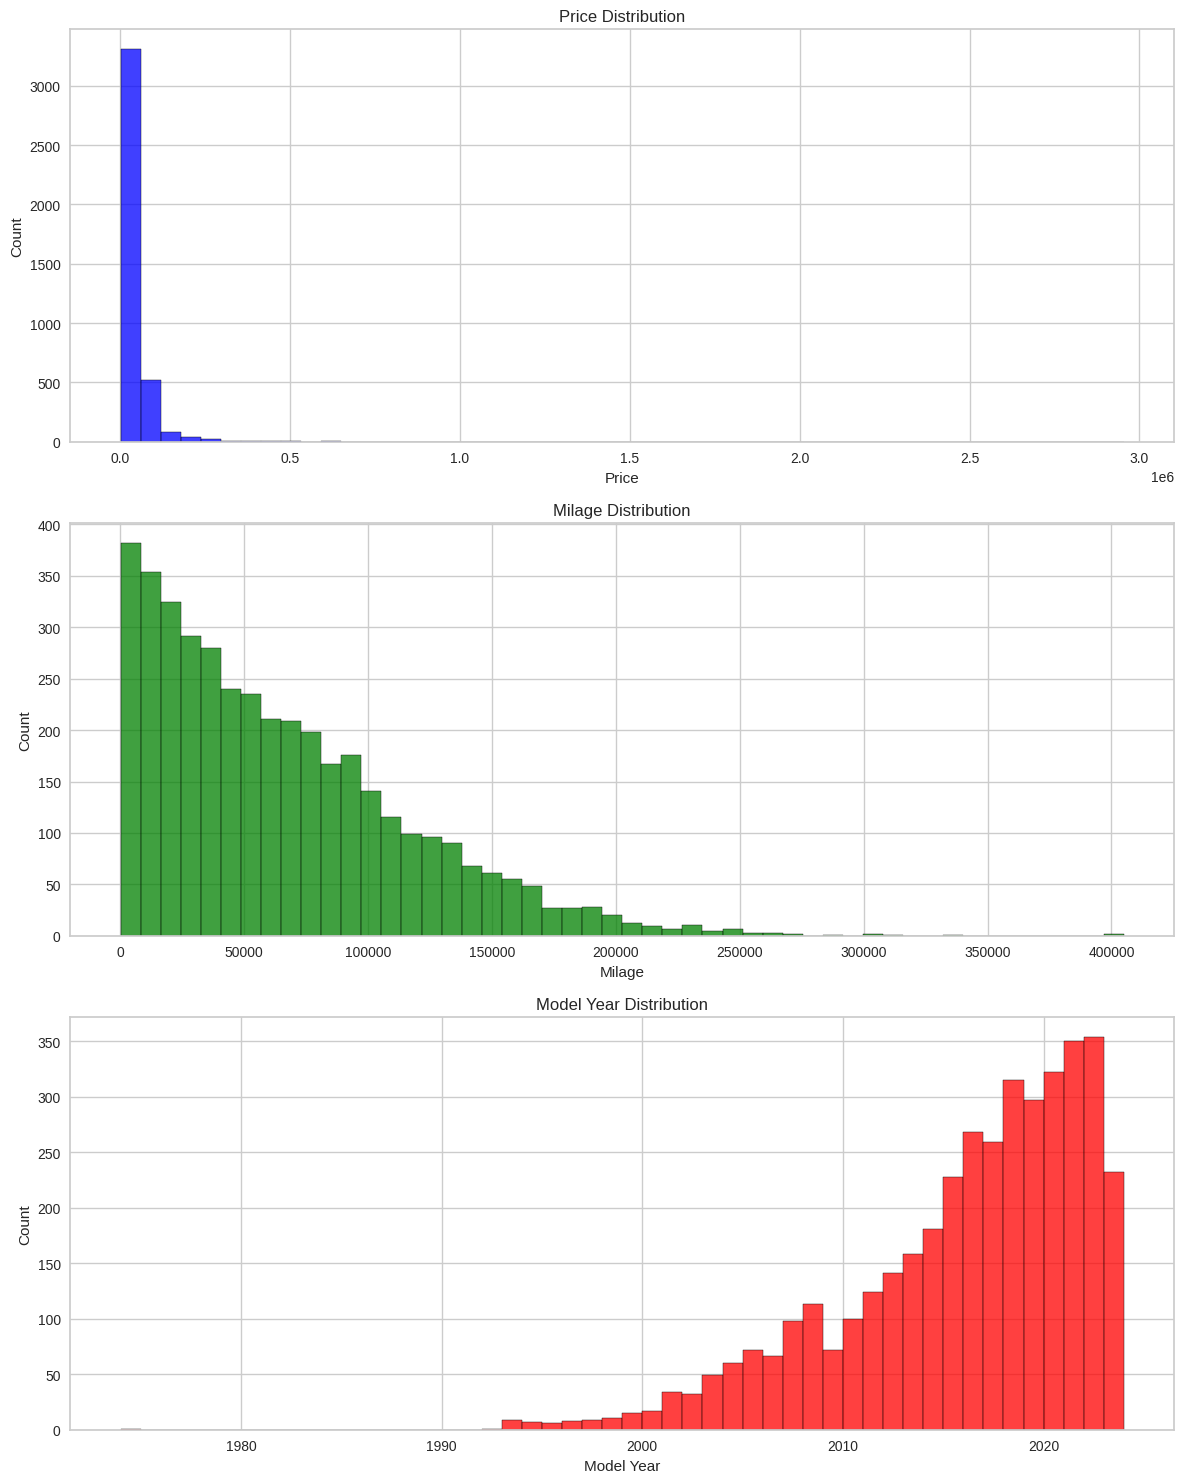

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axs = plt.subplots(nrows=3, figsize=(12, 15))

# Plot distributions
sns.histplot(used_cars['price'], bins=50, ax=axs[0], color='blue')
axs[0].set_title('Price Distribution')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Count')

sns.histplot(used_cars['milage'], bins=50, ax=axs[1], color='green')
axs[1].set_title('Milage Distribution')
axs[1].set_xlabel('Milage')
axs[1].set_ylabel('Count')

sns.histplot(used_cars['model_year'], bins=50, ax=axs[2], color='red')
axs[2].set_title('Model Year Distribution')
axs[2].set_xlabel('Model Year')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


The visualizations provide the following insights:

1. **Price Distribution:**

The majority of cars are priced in the lower range, with a few high-priced outliers.
The distribution is right-skewed, indicating that there are more cars in the lower price range than in the higher price range.
2. **Milage Distribution:**

The majority of cars have milage in the range of 0 to 100,000 miles.
There's a decline in the number of cars as the mileage increases, which is expected as fewer used cars will have extremely high mileage.
3. **Model Year Distribution:**

A significant number of cars are from recent years, with the majority being from around 2010 onwards.
Older cars (pre-2000) are less frequent in the dataset.

Next, let's perform bivariate analysis. We'll explore how the price varies with brand, fuel_type, and transmission.

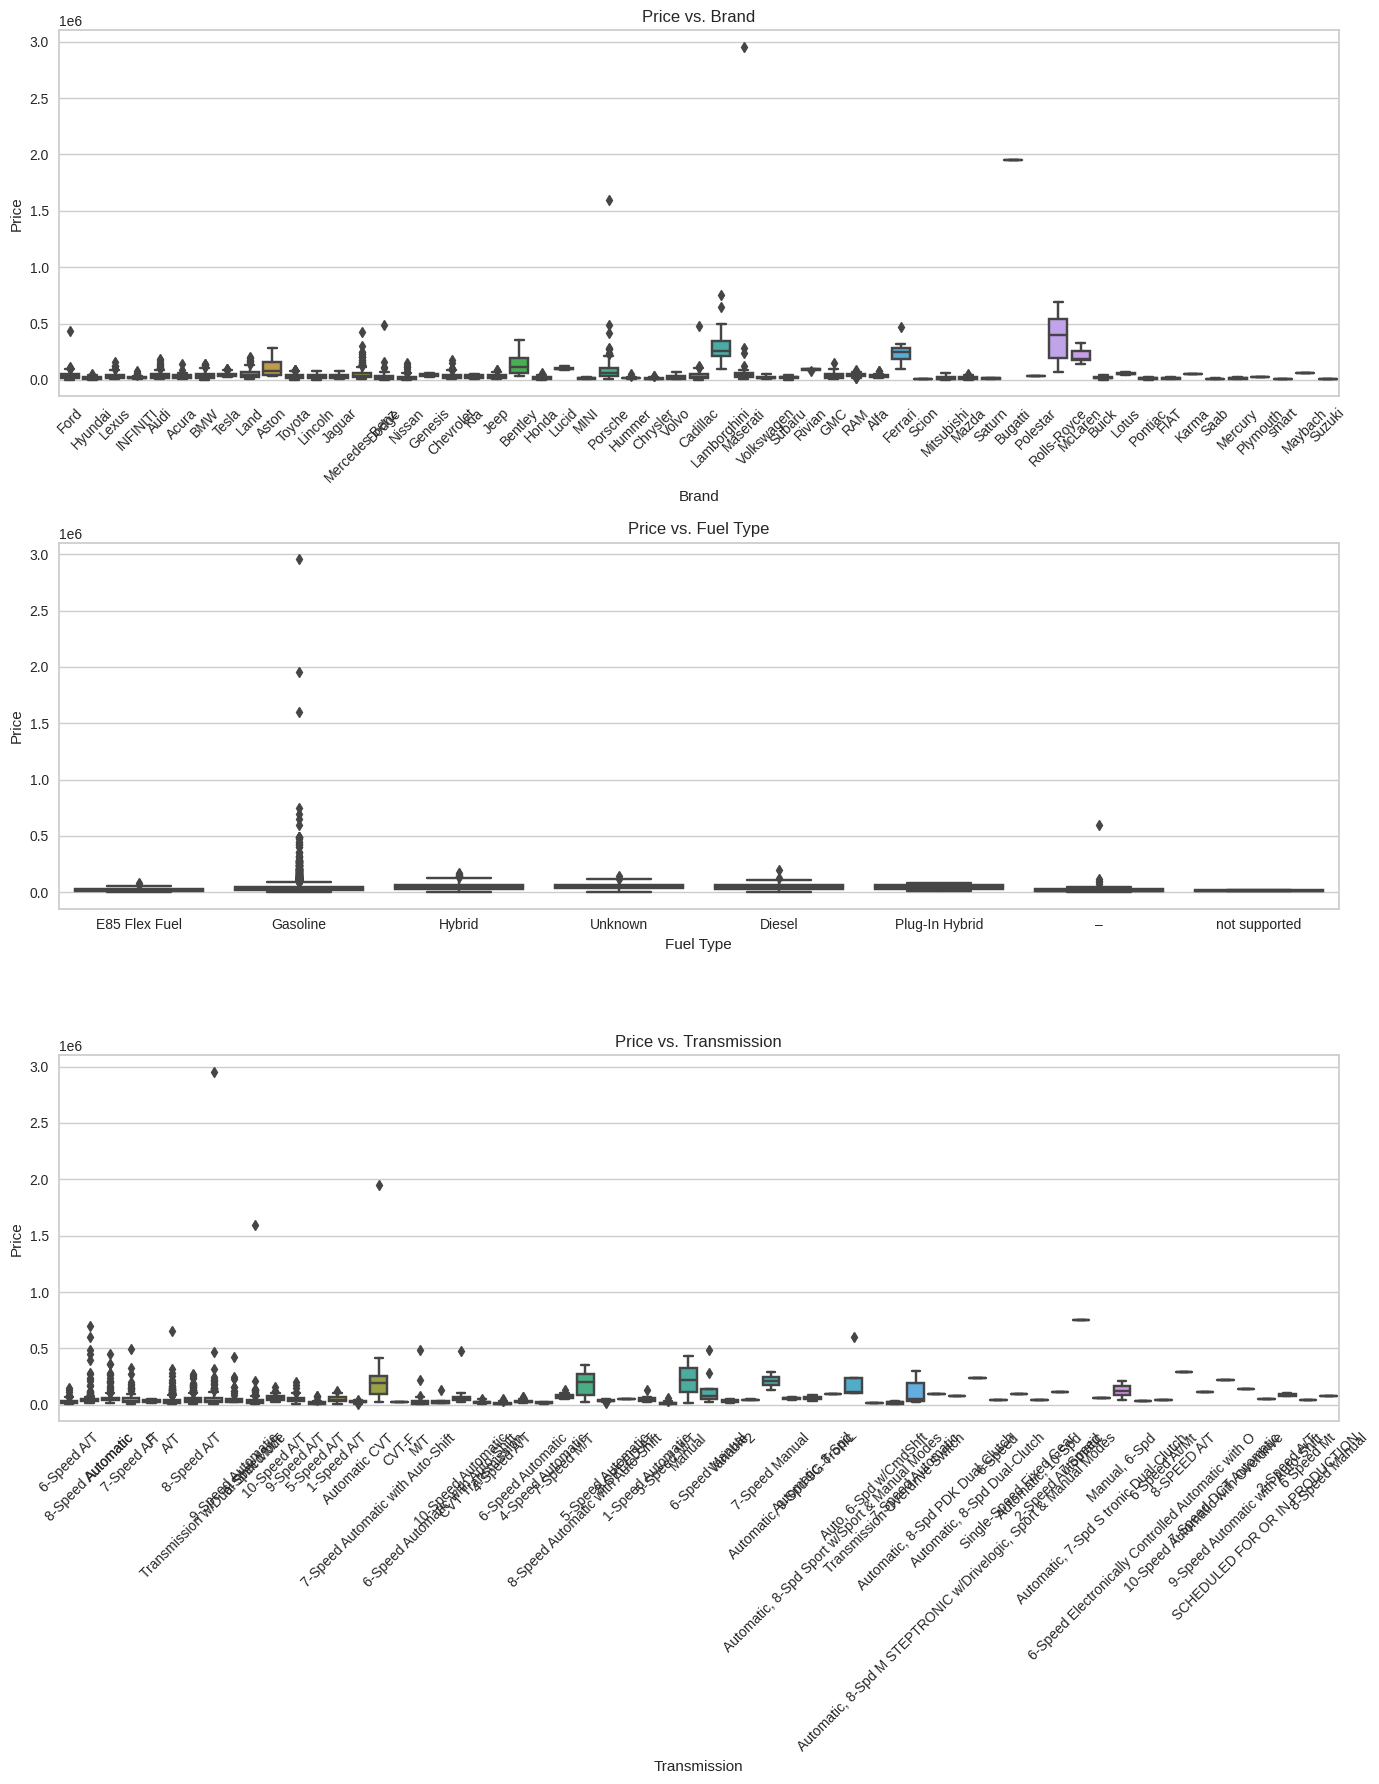

In [ ]:
# Set up the figure and axes
fig, axs = plt.subplots(nrows=3, figsize=(14, 18))

# Plot Price vs. Brand
sns.boxplot(x='brand', y='price', data=used_cars, ax=axs[0])
axs[0].set_title('Price vs. Brand')
axs[0].set_xlabel('Brand')
axs[0].set_ylabel('Price')
axs[0].tick_params(axis='x', rotation=45)

# Plot Price vs. Fuel Type
sns.boxplot(x='fuel_type', y='price', data=used_cars, ax=axs[1])
axs[1].set_title('Price vs. Fuel Type')
axs[1].set_xlabel('Fuel Type')
axs[1].set_ylabel('Price')

# Plot Price vs. Transmission
sns.boxplot(x='transmission', y='price', data=used_cars, ax=axs[2])
axs[2].set_title('Price vs. Transmission')
axs[2].set_xlabel('Transmission')
axs[2].set_ylabel('Price')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The bivariate visualizations reveal the following insights:

1. **Price vs. Brand:**

Some brands tend to have higher median prices than others. For instance, brands like Lamborghini, Bentley, and Tesla have higher median prices in this dataset.
Brands such as Ford, Chevrolet, and Honda have a wide range of prices, suggesting they offer both budget-friendly and premium models.
2. **Price vs. Fuel Type:**

Electric cars tend to have higher median prices compared to other fuel types.
Gasoline and diesel vehicles show a broad range of prices, with gasoline vehicles being more prevalent in the dataset.
3. **Price vs. Transmission:**

Automatic transmission cars appear to have a slightly higher median price than manual transmission cars, although both categories have a wide range of prices.

These visualizations give us a better understanding of how different factors might influence a car's price. For a more in-depth analysis, one could delve into multivariate visualizations or more granular bivariate comparisons.